## TO FIND NO. OF VISITORS ARE CANCELLED 
## THE HOTEL  BOOKING BASED ON CLASSIFICATION APPROACH

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv('hotel booking.csv')

##  Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
# To find number of rows and columns

In [5]:
df.shape

(119390, 36)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [9]:
# Sum of the null values are 0 for categorical data & it is not 0 for numerical data type

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# From the above data agent,company,country having more null values.

In [12]:
df.drop(['company','agent'],axis = 1,inplace = True)
df.dropna(inplace = True)

In [13]:
 # so company, agent we are dropping coz there was no effect on dataset

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118898.0,0.007948,0.097380,0.00,0.0,0.0,0.0,10.0


In [15]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.291994,0.016412,0.007465,-0.006127,-0.002631,0.024110,0.058381,0.004751,-0.032521,-0.085179,0.109922,-0.055493,-0.144659,0.054016,0.046199,-0.194796,-0.235643
lead_time,0.291994,1.000000,0.039924,0.126738,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,-0.125091,0.085961,-0.071128,0.000004,0.170007,-0.066381,-0.115561,-0.096536
arrival_date_year,0.016412,0.039924,1.000000,-0.540493,-0.000590,0.021669,0.031754,0.029146,0.054492,-0.013183,0.010128,-0.119922,0.029800,0.031124,-0.056823,0.197857,-0.012661,0.108927
arrival_date_week_number,0.007465,0.126738,-0.540493,1.000000,0.066839,0.017642,0.015007,0.025394,0.005494,0.010039,-0.030411,0.035367,-0.020768,0.005187,0.022993,0.075277,0.001717,0.025778
arrival_date_day_of_month,-0.006127,0.002320,-0.000590,0.066839,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,-0.006340,-0.027013,0.000118,0.010767,0.022737,0.029923,0.008262,0.003082
stays_in_weekend_nights,-0.002631,0.083984,0.021669,0.017642,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.087836,-0.013008,-0.040597,0.062401,-0.054568,0.047300,-0.018147,0.071669
stays_in_week_nights,0.024110,0.164783,0.031754,0.015007,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.097994,-0.014274,-0.047367,0.095665,-0.002161,0.063628,-0.024378,0.066785
adults,0.058381,0.116799,0.029146,0.025394,-0.001837,0.090410,0.091999,1.000000,0.029590,0.017887,-0.147494,-0.006974,-0.105028,-0.052420,-0.008765,0.227480,0.016370,0.121815
children,0.004751,-0.038335,0.054492,0.005494,0.014562,0.045430,0.044259,0.029590,1.000000,0.024131,-0.032990,-0.024752,-0.020364,0.048660,-0.033396,0.325034,0.057060,0.081786
babies,-0.032521,-0.021149,-0.013183,0.010039,-0.000539,0.018396,0.020157,0.017887,0.024131,1.000000,-0.008954,-0.007489,-0.006306,0.083220,-0.010648,0.028591,0.036971,0.097601


## From above I am considering on which is correlation>0.1


['lead_time','previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

In [16]:
df = df[df['adr']< 5000]

<AxesSubplot:>

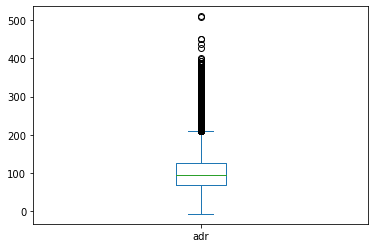

In [17]:
df['adr'].plot(kind = 'box')

In [18]:
df = df[df['adr']< 400]

<AxesSubplot:>

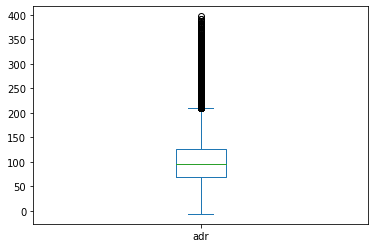

In [19]:
df['adr'].plot(kind = 'box')

## Data Analysis and Visualisation

In [20]:
# Calculate ratio of cancellation of Bookings

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


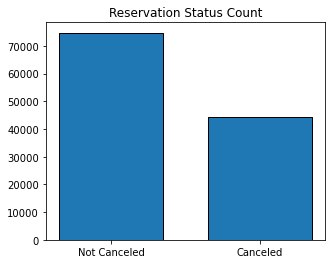

In [21]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled','Canceled'], df['is_canceled'].value_counts(),edgecolor = 'k', width = 0.7)
plt.show()

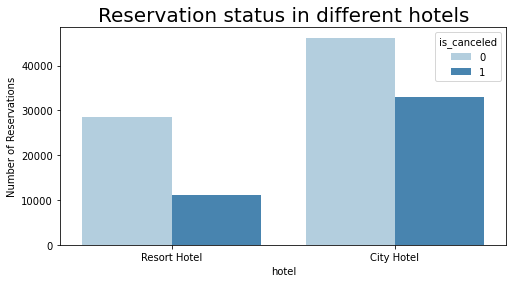

In [22]:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')

# Get the legend handles and labels for customizing the legend
legend_labels, _ = ax1.get_legend_handles_labels()
plt.title('Reservation status in different hotels', size=20)
plt.xlabel('hotel')
plt.ylabel('Number of Reservations')

# Display the count plot
plt.show()

In [23]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.720265
1    0.279735
Name: is_canceled, dtype: float64

In [24]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582908
1    0.417092
Name: is_canceled, dtype: float64

In [25]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

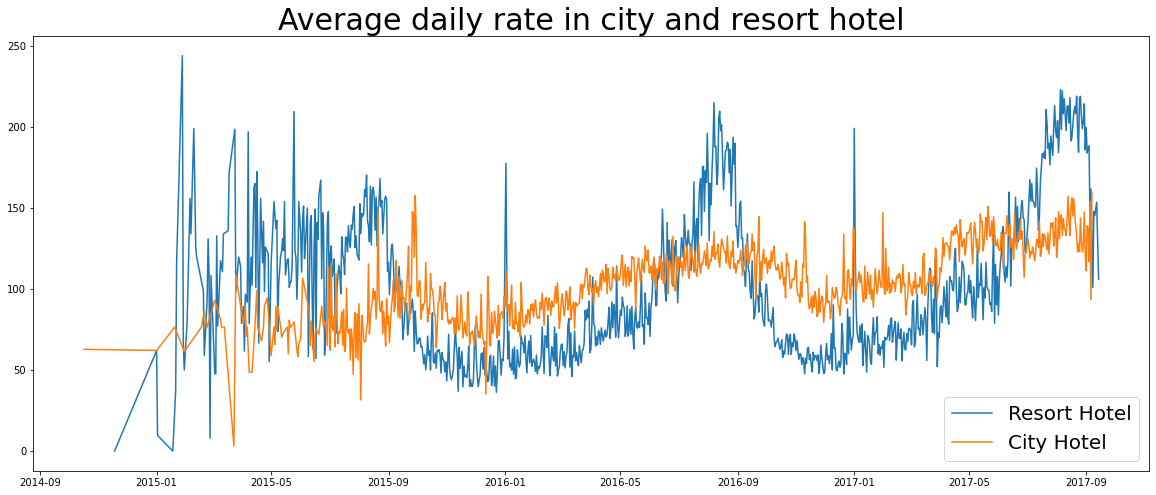

In [48]:
plt.figure(figsize = (20,8))

# Plot the average daily rate for the resort hotel
plt.title('Average daily rate in city and resort hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label= 'Resort Hotel')

# Plot the average daily rate for the city hotel
plt.plot(city_hotel.index, city_hotel['adr'], label= 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

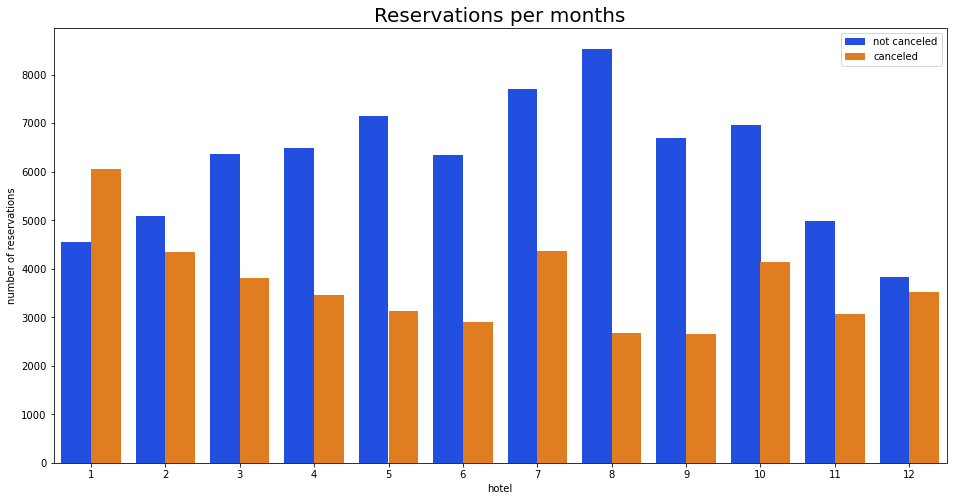

In [49]:
# Extract the month from the 'reservation_status_date' column and assign it to a new 'month' column
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))

# Set the x-axis as 'month', the hue as 'is_canceled', and the data as the DataFrame 'df'
ax1 = sns.countplot(x= 'month', hue = 'is_canceled', data = df, palette = 'bright')

# Get the legend handles and labels for customizing the legend
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))

plt.title('Reservations per months', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

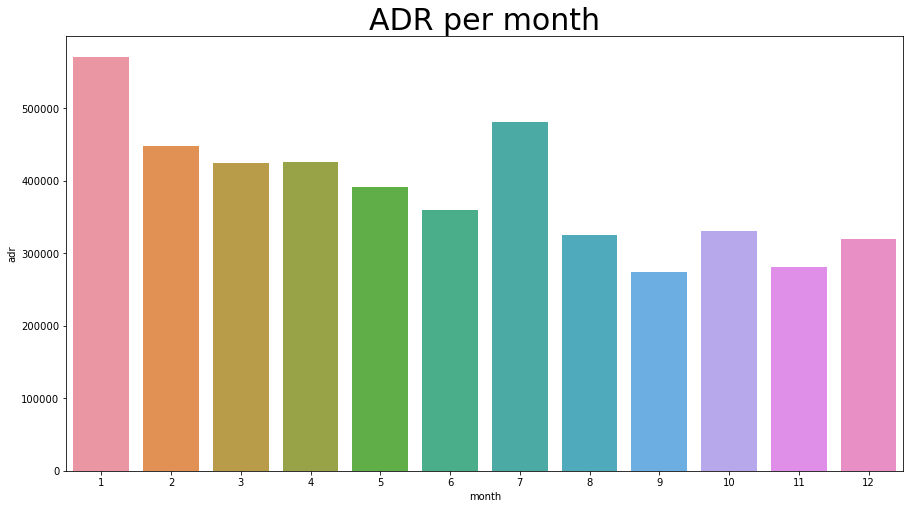

In [53]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize= 30)

# Create a bar plot using Seaborn's `barplot` function
# Set the x-axis as 'month', the y-axis as 'adr', and the data as the grouped data
sns.barplot('month', 'adr', data= df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

In [51]:
df['is_canceled'].value_counts()

0    74740
1    44150
Name: is_canceled, dtype: int64

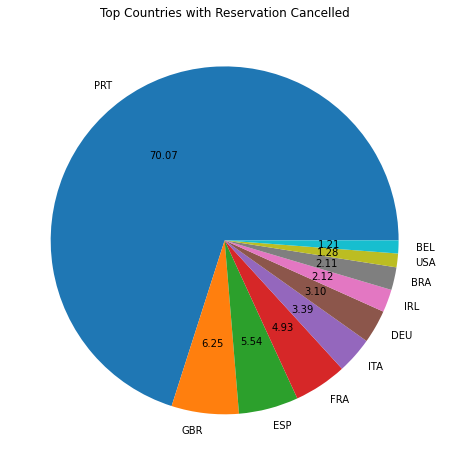

In [52]:
# Filter the DataFrame to include only canceled reservations
cancelled_data = df[df['is_canceled'] == 1]

# Count the occurrences of each country in the canceled reservations and select the top 10 countries
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8, 8))
plt.title('Top Countries with Reservation Cancelled')

# The `autopct` parameter specifies the format of the percentage values
# The `labels` parameter specifies the labels for each pie slice, which are the country names
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)

plt.show()

# Splitting the data into train and test sets¶
.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
feature = df[['lead_time','previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']]
label =  df['is_canceled']

In [33]:
X = feature  # x -Independent Variable

y = label  # y -Dependent Variable

Test and Train we split as 70:30 ratio

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Random Forest Classifier
"Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their predictions for more accurate results. It uses random subsets of data and features to reduce overfitting and improve generalization

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=140,max_features='auto', max_depth=20)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

RFC

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     22458
           1       0.71      0.59      0.65     13209

    accuracy                           0.76     35667
   macro avg       0.75      0.72      0.73     35667
weighted avg       0.76      0.76      0.75     35667


confusion matrix
[[19310  3148]
 [ 5417  7792]]
accuracy of random forest model =  0.7598620573639498


<AxesSubplot:>

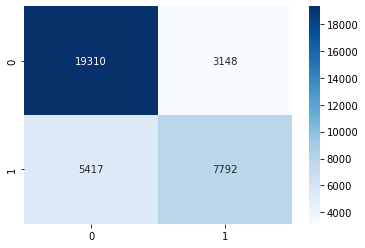

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('RFC' + '\n')
print(classification_report(y_test,rfcpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,rfcpred))
print('accuracy of random forest model = ', accuracy_score(y_test,rfcpred))
sns.heatmap(confusion_matrix(y_test,rfcpred),annot=True, fmt='g',cmap='Blues')

# Formulas -
Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP))

Accuracy = (True Positives (TP) + True Negatives (TN)) / (TP + FP + TN + FN)

Recall = True Positives (TP) / (True Positives (TP) + False Negatives (FN))

F1-score = 2 * (Precision * Recall) / (Precision + Recall)


# KNN Classifier
K-Nearest Neighbor is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

KNN

              precision    recall  f1-score   support

           0       0.77      0.84      0.80     22458
           1       0.67      0.57      0.62     13209

    accuracy                           0.74     35667
   macro avg       0.72      0.71      0.71     35667
weighted avg       0.73      0.74      0.73     35667


confusion matrix
[[18784  3674]
 [ 5617  7592]]
accuracy of KNN Classifier model =  0.7395071074102111


<AxesSubplot:>

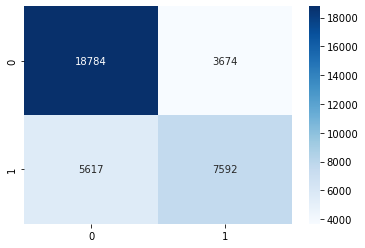

In [40]:
print('KNN' + '\n')
print(classification_report(y_test,knnpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,knnpred))
print('accuracy of KNN Classifier model = ', accuracy_score(y_test,knnpred))
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True, fmt='g',cmap='Blues')

# Logistic Regression

Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(solver='liblinear')

              precision    recall  f1-score   support

           0       0.72      0.89      0.80     22458
           1       0.68      0.42      0.52     13209

    accuracy                           0.71     35667
   macro avg       0.70      0.65      0.66     35667
weighted avg       0.71      0.71      0.69     35667


confusion matrix:

accuracy of Logistic Regression model =  0.7137690301959795


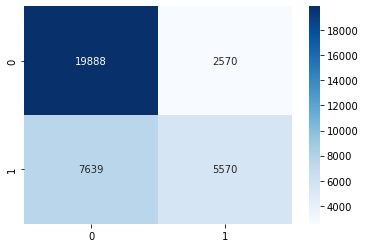

In [42]:
lr.fit(X_train,y_train)
lrpredict = lr.predict(X_test)
print(classification_report(y_test,lrpredict))
print('\n' + 'confusion matrix:' + '\n')
sns.heatmap(confusion_matrix(y_test,lrpredict),annot=True, fmt='g',cmap='Blues')
print('accuracy of Logistic Regression model = ', accuracy_score(y_test,lrpredict))

To Find Accuracy of which model is high -

In [43]:
print('accuracy of Logistic Regression model = ', accuracy_score(y_test,lrpredict))
print('accuracy of KNN Classifier model = ', accuracy_score(y_test,knnpred))
print('accuracy of random forest model = ', accuracy_score(y_test,rfcpred))

accuracy of Logistic Regression model =  0.7137690301959795
accuracy of KNN Classifier model =  0.7395071074102111
accuracy of random forest model =  0.7598620573639498


# From above, we can see accuracy of Random Forest Classification model is high, So we can use random forest for  future prediction.
.

# Conclusion : 

# From above , we can see Cancellation rates rise as the price does. in order to to prevent cancellations of reservations,hotel should work on their pricing strategies and should try to lower the rates for specific hotels based on locations

# As the ratio of cancellation of the city hotels is comparitively higher than resort hotels

# Thank You !!